# Employee attrition forecast

#### Purpose: 
To keep good employees we must find out what factors contribute them to leave the company. 

#### Goal: 
Find features that are of main importantce for attrition prediction and build a classificaiton model that will predict the likelyhood of employees attrition. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We have a full dataset with no missing values. However, we have several non integer datadtypes which might have to be converted for better data processing. 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


- 50% is also called the median. If the median and mean are mismatching, there are likely to be outliers. 
- median less than mean = right scewed data
- either many outliers or a few big ones

In this case the data seems clean. No variables stand out as outliers except maybe the DistanceFromHome where the average is 9.2 and the middle value is at 7.0. 

In [6]:
df.shape

(1470, 35)

In [7]:
# proportion of Attrition, class is imbalanced.
print(df.Attrition.value_counts())
print(df.Attrition.value_counts(normalize=True))

No     1233
Yes     237
Name: Attrition, dtype: int64
No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


When the dependant variable (the variable we want to predict), in this case Attrition, is not equally represented among the dataset, the supervised machine learning algorithm is likely to become biased towards the majority class as it has more data to learn from and poorly predict the minority class, expecially unseen data, as it did not receive enough examples during training.

To overcome imbalanced data issues, we can apply SMOTE algorithm. 

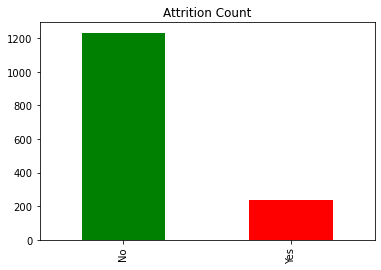

In [8]:
#visualizing the large class imbalance 
df.Attrition.value_counts().plot(kind="bar", color = ("green", "red")).set_title('Attrition Count')
plt.show()

In [9]:
#checking which variables need to be adjusted. 
#excluding "number" will recognize both floats and integers

categorical_cols = df.select_dtypes(exclude=["number", "bool_"])
categorical_cols

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [10]:
# label encoding to clean up categorical data
categorical_data = {
    'Attrition': {'No':0, 'Yes':1}, 
    'BusinessTravel': {'Non-Travel':0, 'Travel_Frequently':1, 'Travel_Rarely':2}, 
    'Department': {'Human Resources':0, 'Research & Development':1, 'Sales':2}, 
    'EducationField': {'Human Resources':0, 'Life Sciences':1, 'Marketing':2, 'Medical':3, 'Technical Degree':4, 'Other':5}, 
    'Gender': {'Female':0, 'Male':0}, 
    'JobRole': {'Healthcare Representative':0, 'Human Resources':1, 'Laboratory Technician':2, 'Manager':3, 'Manufacturing Director':4, 'Research Director':5, 'Research Scientist':6, 'Sales Executive':7, 'Sales Representative':8}, 
    'MaritalStatus': {'Divorced':0, 'Single':1, 'Married':2}, 
    'Over18': {'N':0, 'Y':1},
    'OverTime': {'No':0, 'Yes':1}
     }
df = df.replace(categorical_data)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,5,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [11]:
#not necessary here. No outliers in this dataset 
'''
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
'''

'''
outlierTest = df.select_dtypes(["number","bool_","float"])


for col in outlierTest:
    for col in outlierTest:
        replace_with_thresholds(df, col)
        
df.describe().T 

'''

'\noutlierTest = df.select_dtypes(["number","bool_","float"])\n\n\nfor col in outlierTest:\n    for col in outlierTest:\n        replace_with_thresholds(df, col)\n        \ndf.describe().T \n\n'

<AxesSubplot:>

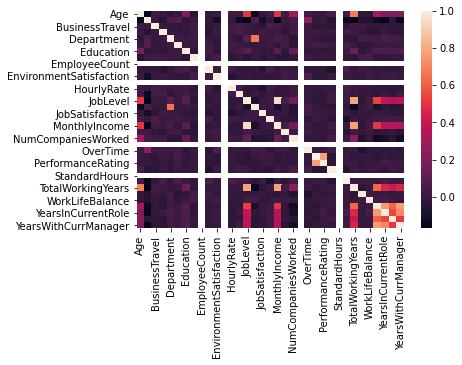

In [12]:
#checking general correlation among variables
sns.heatmap(df.corr())  

In [13]:
#dataframe with correlation values of all variables
correlation = df.corr()

In [14]:
#correlation overall very weak. only OverTime variable stands out
correlation["Attrition"].sort_values(ascending = False)

Attrition                   1.000000
OverTime                    0.246118
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
EducationField              0.009275
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
MaritalStatus              -0.011195
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
M

In [15]:
# droping NaN features
df = df.drop(columns=['Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours'])

### Model Training:

In [16]:
#defining independant (X) and dependant (y) variables
X, y = df.drop("Attrition", axis=1), df.Attrition

In [17]:
#splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

It's necessary to split the available data into two parts at least. One part, the bigger part, is used to train the algorithm. The testing data set will be used to measure the performance of the algorithm on previously unseen data.

In [18]:
#initializing the chosen model
rfc = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)

In [19]:
#running the model with the training data
rfc.fit(X_train, y_train)
#getting the predictions for the test data
y_pred_rf = rfc.predict(X_test)

In [20]:
# checking performance of the model
#reminder: 0 = not attrition, 1 = attrition 
report = metrics.classification_report(y_test, y_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.50      0.06      0.11        48

    accuracy                           0.87       368
   macro avg       0.69      0.53      0.52       368
weighted avg       0.83      0.87      0.82       368



The classification report shows that the model appears to perform well in correctly identifying cases of non-attrition (class 0) with high precision and recall. However, it struggles to identify cases of attrition (class 1) with low precision and recall. As suggested earlier the imbalanced data causes issues for sufficiant predictions. 

(A detailed explanation of the classification report follows at the end)

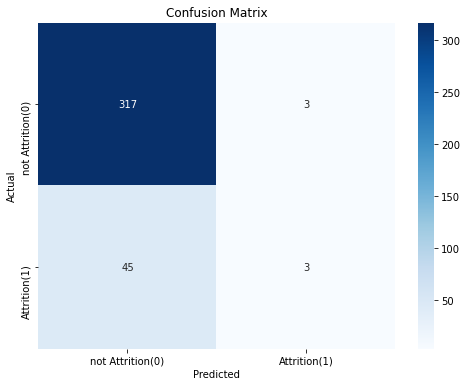

In [21]:
#Visualization showing the number of TP, TN, FP, FN classifications made by the model
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['not Attrition(0)', 'Attrition(1)'],
            yticklabels=['not Attrition(0)', 'Attrition(1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Correct attrition classification (TP): There are 3 true positive predictions (the model correctly predicted attrition) among employees who actually experienced attrition (class 1). This means the model identified a small portion of the attrition cases correctly.

Wrongly classified as not attrition (FN): There are 45 false negative predictions (the model predicted no attrition, but attrition did occur) among employees who actually experienced attrition (class 1). This indicates that the model missed a substantial number of attrition cases, which could be a concern for employee retention efforts.

Correct not attrition classification (TN): There are 317 true negative predictions (the model correctly predicted no attrition) among employees who did not experience attrition (class 0). This shows the model's ability to accurately identify employees who are not at risk of attrition.

Wrongly classified as attrition (FP): There are 3 false positive predictions (the model predicted attrition, but there was no attrition) among employees who did not experience attrition (class 0). While this is a relatively small number, it still represents instances where the model made incorrect predictions of attrition for employees who didn't leave.

Top 10 Features: ['OverTime', 'MonthlyIncome', 'TotalWorkingYears', 'Age', 'YearsAtCompany', 'StockOptionLevel', 'JobLevel', 'YearsWithCurrManager', 'DailyRate', 'YearsInCurrentRole']


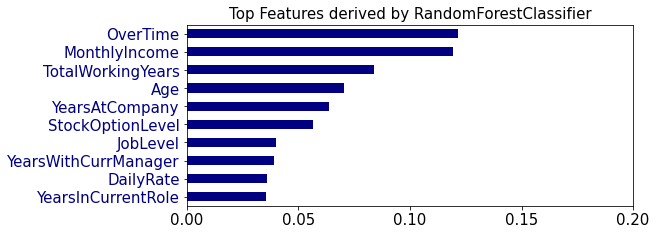

In [22]:
n = 10 #number of top features to show on graph
pd.Series(rfc.feature_importances_, index=X.columns).nlargest(n).plot(kind='barh', figsize=[8, n/3], color='navy').invert_yaxis() 
# most important feature is on top, ie, descending order
ticks_x = np.linspace(0, 0.2, 5)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=15, color='black')
plt.yticks(size=15, color='navy' )
plt.title('Top Features derived by RandomForestClassifier', size=15, color = 'black')
top10_features = pd.Series(rfc.feature_importances_, index=X.columns).nlargest(10)
print('Top 10 Features:', list(top10_features.index))

This feature importance graph is based on the Random Forest model made with training data. 

<ipython-input-23-26ea2b5694f4>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_top10.corr(), dtype=np.bool)


(11.5, -0.5)

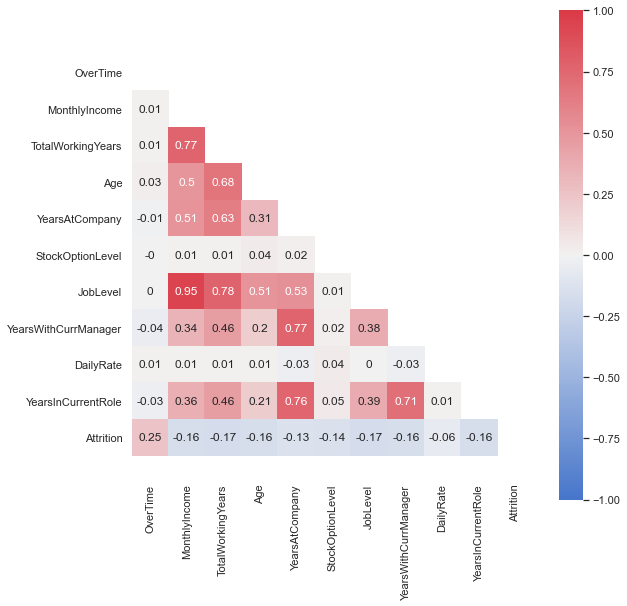

In [23]:
# check for correlation between top 10 features
X = df.loc[:, top10_features.index]
df_top10 = X.join(y)
# correlation matrix heatmap visualization
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(df_top10.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(9,9))
# Create a custom color palette
cmap = sns.diverging_palette(255, 10, as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Red=10, Green=128, Blue=255

# Plot the heatmap
sns.heatmap(df_top10.corr().round(2), mask=mask, annot=True, annot_kws={"size": 12}, square=True, 
            cmap=cmap , vmin=-1, vmax=1, ax=ax)  # annot=True display corr label
# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)


In [53]:
feature_importance = []
importance = rfc.feature_importances_
for i,v in enumerate(importance):
    feature = 'Feature: %0d, Score: %.5f' % (i,v)
    feature_importance.append(feature)

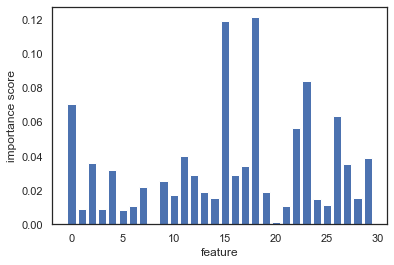

In [38]:
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel("feature")
plt.ylabel("importance score")
plt.show()

Since data is unbalanced, SMOTE is applied to normalize the data and then run the Random forrest alg again

In [31]:
#initializing smote
sm = SMOTE(random_state=42)

#splitting data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#applying smote to the training data
sm_train_X, sm_train_y = sm.fit_resample(X_train, y_train)


In [32]:
#initializing random forrest again
rfc = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)

#fitting the balanced smote training data to the random forrest
rfc.fit(sm_train_X, sm_train_y)

#predicting the attrition/not attrition from the balanced training data
sm_pred = rfc.predict(sm_train_X)

In [33]:
report = metrics.classification_report(sm_train_y, sm_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       853
           1       0.80      0.82      0.81       853

    accuracy                           0.80      1706
   macro avg       0.81      0.80      0.80      1706
weighted avg       0.81      0.80      0.80      1706



#### Classification report results interpretation
- Precision: The precision for both class 0 (not attrition) and class 1 (attrition) is approximately 0.81 and 0.80, respectively. This suggests that the model correctly predicts employees who will not experience attrition about 81% of the time and employees who will experience attrition about 80% of the time. The precision scores for both classes are reasonably high and balanced.

- Recall: The recall for class 0 is 0.79, indicating that the model correctly identifies a sufficiant number of instances where employees do not experience attrition. For class 1, the recall is 0.82, meaning that the model captures a significant portion of the attrition cases. These recall values demonstrate an improved ability to identify both non-attrition and attrition cases.

- F1-Score: The F1-score for both class 0 and class 1 is approximately 0.80. These scores represent a balanced harmonic mean of precision and recall for both classes, indicating a well-rounded model performance.

- Accuracy: The overall accuracy of the model is 0.80, suggesting that the model correctly predicts the class labels for approximately 80% of the total instances. This indicates a consistent and reliable performance across both classes. While the accuracy seemed higher after the first model training, it is a lot more reliable now since the unbalanced data leads to a miss leading accuracy.

- Macro Avg: The macro-averaged precision, recall, and F1-score provide an average across both classes. In this case, the macro-averaged F1-score is 0.80, indicating strong overall model performance, with balanced consideration for both classes.

- Weighted Avg: The weighted-averaged precision, recall, and F1-score consider class support. In this case, the weighted-averaged F1-score is also 0.80, highlighting a balanced performance measure that accounts for the class distribution.



### Conclusion

The model, after applying SMOTE and retraining, demonstrates improved performance in correctly identifying employees who will and will not experience attrition. The precision, recall, and F1-score values are well-balanced for both classes, indicating an effective classification model. This model is valuable for employee attrition prediction and retention efforts.

After balancing the data we can now also see a new distribution of the most important features (see visualization below). While initially OverTime was the feature with the strongst predictive power, it has now moved down to place 10. The StockOptionLevel has taken the lead followed by Marital Status, which was not even under the top 10 previously. MonthlyIncome remained in second position, folowed by YearsInCurrentRole which was previously at the bottom of the top 10.

Top 10 Features: ['StockOptionLevel', 'MonthlyIncome', 'YearsInCurrentRole', 'JobLevel', 'TotalWorkingYears', 'YearsWithCurrManager', 'Age', 'YearsAtCompany', 'DailyRate', 'OverTime']


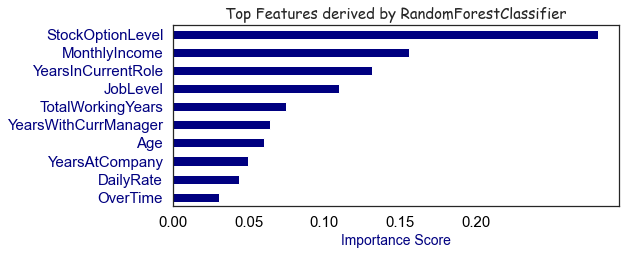

In [43]:
n = 10 #number of top features to show on graph
pd.Series(rfc.feature_importances_, index=X.columns).nlargest(n).plot(kind='barh', 
figsize=[8, n/3], color='navy').invert_yaxis() # most important feature is on top, ie, descending order
ticks_x = np.linspace(0, 0.2, 5)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=15, color='black')
plt.yticks(size=15, color='navy')
plt.title('Top Features derived by RandomForestClassifier', family='fantasy', size=15)
plt.xlabel('Importance Score', size = 14, color='navy')
top10_features = pd.Series(rfc.feature_importances_, index=X.columns).nlargest(10)
print('Top 10 Features:', list(top10_features.index))